In [5]:
import pandas as pd

df = pd.read_csv("hf://datasets/nirajandhakal/Devnagari-Romanized-Pair/English-Nepali Text.csv")

d:\Github\365DaysOfData\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df.head()

,English,Nepali Translation,Nepali Romanized
0,I am going to the market to buy some vegetable...,म बजारमा केही तरकारी र फलफूल किन्न जाँदैछु।,Ma bajaarma kehi tarkari ra phalaphul kinna ja...
1,"If you need any help, please don't hesitate to...","यदि तपाईंलाई कुनै मद्दत चाहिएमा, कृपया मलाई सो...","Yadi tapaailaai kunai maddat chaahieema, kripa..."
2,I would like to book a room in a hotel near th...,म एयरपोर्ट नजिकैको होटलमा कोठा बुक गर्न चाहन्छु।,Ma airport najikkai ko hotelma kotha book garn...
3,Could you please tell me how to get to the nea...,कृपया मलाई नजिकको बस स्टेशन कसरी पुग्ने बताउन ...,Kripaya malai najikko bus station kasari pugne...
4,I am interested in learning more about Nepali ...,मलाई नेपाली संस्कृति र परम्पराको बारेमा थप जान...,Malai Nepali sanskriti ra parampara ko baarema...


#### OKAY, let's build seq2seq architecture 

In [7]:
pairs = df[["English", "Nepali Translation"]].values.tolist()

pairs[0:5]

[['I am going to the market to buy some vegetables and fruits.',
  'म बजारमा केही तरकारी र फलफूल किन्न जाँदैछु।'],
 ["If you need any help, please don't hesitate to ask me.",
  'यदि तपाईंलाई कुनै मद्दत चाहिएमा, कृपया मलाई सोध्न नहिचकिचाउनुहोस्।'],
 ['I would like to book a room in a hotel near the airport.',
  'म एयरपोर्ट नजिकैको होटलमा कोठा बुक गर्न चाहन्छु।'],
 ['Could you please tell me how to get to the nearest bus station?',
  'कृपया मलाई नजिकको बस स्टेशन कसरी पुग्ने बताउन सक्नुहुन्छ?'],
 ['I am interested in learning more about Nepali culture and traditions.',
  'मलाई नेपाली संस्कृति र परम्पराको बारेमा थप जान्न मन छ।']]

In [8]:
import random
random.seed(42)

random.shuffle(pairs)

train_pairs = pairs[:int(len(pairs) * 0.8)]
val_pairs = pairs[int(len(pairs) * 0.8):int(len(pairs) * 0.9)]

In [9]:
train_pairs[0:5]

[['This period could redefine our economic, cultural, technological aspects.',
  'यो अवधिले हाम्रो आर्थिक, सांस्कृतिक, प्राविधिक पक्षहरूलाई पुन: परिभाषित गर्न सक्छ।'],
 ['This perspective, though now known to be flawed, provided a new direction in the treatment of cancer, and moved beyond the humoral theories.',
  'यो परिप्रेक्ष्य, अहिले त्रुटिपूर्ण भएको थाहा भए पनि, क्यान्सरको उपचारमा नयाँ दिशा प्रदान गर्\u200dयो, र हास्य सिद्धान्तहरूभन्दा पर गयो।'],
 ['The MS-ring functions as a rotating anchor.',
  'MS-रिङले घुम्ने एंकरको रूपमा कार्य गर्दछ।'],
 ['Expanded Analysis: Unveiling the Krebs Cycle: A Central Hub of Cellular Respiration',
  'विस्तारित विश्लेषण: क्रेब्स चक्रको अनावरण: सेलुलर श्वासप्रश्वासको एक केन्द्रीय केन्द्र'],
 ['Ridley’s quote, "The two chromosomes no longer have each other’s interests at heart, let alone those of the species as a whole," underscores this crucial point. He demonstrates the way that selection at the level of the gene can lead to outcomes that appear cont

In [10]:
%pip install spacy
%pip install nltk
%pip install transformers



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:

import re
import nltk
from nltk.tokenize import word_tokenize
import spacy
from transformers import AutoTokenizer

# 1. Whitespace Tokenization
text = "I am learning NLP."
tokens_whitespace = text.split()

# 2. Regex Tokenization
tokens_regex = re.findall(r'\b\w+\b', text)

# 3. NLTK Word Tokenizer
nltk.download('punkt_tab')
tokens_nltk = word_tokenize(text)

# 4. spaCy Tokenizer
nlp = spacy.blank("en")
tokens_spacy = [token.text for token in nlp(text)]

# 5. Subword Tokenization (e.g., Byte Pair Encoding)
# Example using HuggingFace's tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokens_subword = tokenizer.tokenize(text)

print("Whitespace:", tokens_whitespace) 
print("Regex:", tokens_regex)
print("NLTK:", tokens_nltk)
print("spaCy:", tokens_spacy)
print("Subword:", tokens_subword)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Whitespace: ['I', 'am', 'learning', 'NLP.']
Regex: ['I', 'am', 'learning', 'NLP']
NLTK: ['I', 'am', 'learning', 'NLP', '.']
spaCy: ['I', 'am', 'learning', 'NLP', '.']
Subword: ['i', 'am', 'learning', 'nl', '##p', '.']


In [12]:
def tokenize_english(sentence):
    return word_tokenize(sentence)  # NLTK tokenizer for English

def tokenize_nepali(sentence):
    # Assuming a simple whitespace tokenizer for Nepali
    return sentence.split()  # Basic whitespace tokenizer for Nepali

In [13]:
from collections import Counter

def build_vocab(sentences, language_tokenizer):
    counter = Counter()

    for sent in sentences:
        tokens = language_tokenizer(sent)
        counter.update(tokens)

        vocab = {
            "<pad>": 0,
            "<sos>": 1,
            "<eos>": 2,
            "<unk>": 3
        }

        
        idx = 4 # we need this to start from 4 because we already have 4 special tokens
        for word, count in counter.items():
            if count >= 2:
                vocab[word] = idx
                idx += 1


    return vocab



In [14]:
src_sentences = [src for src, tgt in train_pairs]
tgt_sentences = [tgt for src, tgt in train_pairs]

src_vocab = build_vocab(src_sentences, tokenize_english)
tgt_vocab = build_vocab(tgt_sentences, tokenize_nepali)


In [15]:
src_sentences[10:15], tgt_sentences[10:15]

(['The reduction of oxygen by electrons and protons is a very important step as it forms water (H2O), completing the sequence.',
  'Hawking presents two main approaches to resolve these paradoxes.',
  'Hawking\'s exploration of extraterrestrial life transcends the usual science fiction tropes; it\'s rooted in a careful analysis of what constitutes "life" itself.',
  'Chapter 3, titled "The Goodness of Show Business," marks a pivotal transition point, shifting the narrative away from the focus on the physical act of surgery and towards the transformative potential of chemotherapy.',
  'This transfer of electrons is coupled with the pumping of two protons (H<sup>+</sup>) from the matrix to the intermembrane space, thereby adding to the overall proton gradient.'],
 ['इलेक्ट्रोन र प्रोटोनहरूद्वारा अक्सिजनको कमी एक धेरै महत्त्वपूर्ण चरण हो किनकि यसले पानी (H2O) बनाउँछ, क्रम पूरा गर्दछ।',
  'हकिङले यी विरोधाभासहरू समाधान गर्न दुई मुख्य दृष्टिकोण प्रस्तुत गर्नुहुन्छ।',
  'हकिङको बाह्य जीवनको 

In [16]:
len(src_vocab), len(tgt_vocab)

(2197, 2350)

In [17]:
def numericalize(sentence, vocab, tokenizer, add_sos_eos=False):
    tokens = tokenizer(sentence)

    ids = [vocab.get(token, vocab["<unk>"]) for token in tokens]

    if add_sos_eos:
        ids = [vocab["<sos>"]] + ids + [vocab["<eos>"]]

    return ids


In [18]:
import os
import torch

In [19]:
class TranslationDataset(torch.utils.data.Dataset):
    def __init__(self, pairs, src_vocab, tgt_vocab, src_tokenizer, tgt_tokenizer):
        self.pairs = pairs
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab
        self.src_tokenizer = src_tokenizer
        self.tgt_tokenizer = tgt_tokenizer

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        src, tgt = self.pairs[idx]

        src_tensor = torch.tensor(numericalize(src, self.src_vocab, self.src_tokenizer), dtype=torch.long)
        tgt_tensor = torch.tensor(numericalize(tgt, self.tgt_vocab, self.tgt_tokenizer, add_sos_eos=True), dtype=torch.long)

        return src_tensor, tgt_tensor


In [20]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

def collate_fn(batch):
	src_batch, tgt_batch = zip(*batch)
	src_batch = pad_sequence(src_batch, padding_value=src_vocab['<pad>'], batch_first=True)
	tgt_batch = pad_sequence(tgt_batch, padding_value=tgt_vocab['<pad>'], batch_first=True)
	return src_batch, tgt_batch

train_dataset = TranslationDataset(train_pairs, src_vocab, tgt_vocab, tokenize_english, tokenize_nepali)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

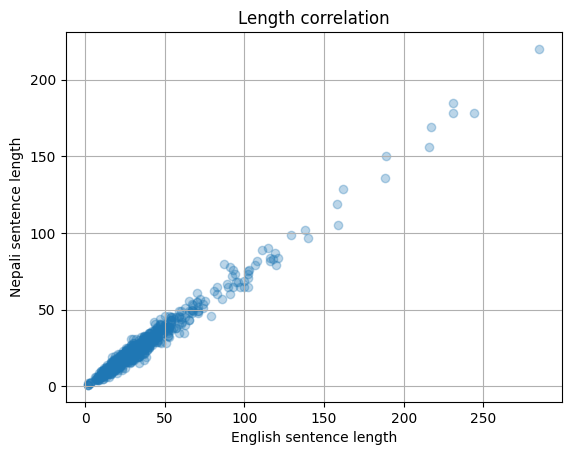

In [21]:
import matplotlib.pyplot as plt

src_lengths = [len(tokenize_english(s)) for s, _ in train_pairs]
tgt_lengths = [len(tokenize_nepali(t)) for _, t in train_pairs]

plt.scatter(src_lengths, tgt_lengths, alpha=0.3)
plt.xlabel("English sentence length")
plt.ylabel("Nepali sentence length")
plt.title("Length correlation")
plt.grid(True)
plt.show()



In [22]:
print(f"English vocab size: {len(src_vocab)}")
print(f"Nepali vocab size : {len(tgt_vocab)}")


English vocab size: 2197
Nepali vocab size : 2350


In [23]:
from collections import Counter

src_words = Counter()
tgt_words = Counter()

for s, t in train_pairs:
    src_words.update(tokenize_english(s))
    tgt_words.update(tokenize_nepali(t))

print("Top 20 ENGLISH words:")
print(src_words.most_common(20))

print("\nTop 20 NEPALI words:")
print(tgt_words.most_common(20))


Top 20 ENGLISH words:
[('the', 1533), (',', 1528), ('of', 1093), ('.', 1034), ('and', 673), ('a', 640), ('to', 520), ('that', 354), ('in', 320), ('is', 319), ('as', 212), ('This', 209), ('The', 207), ('for', 171), ('’', 148), (':', 140), ('on', 138), ('it', 134), ('with', 120), ('by', 112)]

Top 20 NEPALI words:
[('र', 670), ('यो', 325), ('एक', 270), ('रूपमा', 265), ('लागि', 176), ('गर्न', 154), ('जसले', 139), ('कि', 133), ('गर्दछ।', 117), ('जुन', 113), ('पनि', 108), ('यसले', 98), ('यी', 90), ('को', 84), ('महत्त्वपूर्ण', 79), ('ऊर्जा', 75), ('छ।', 71), ('गर्दछ,', 68), ('गर्ने', 66), ('धेरै', 63)]


In [24]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_batch = pad_sequence(src_batch, padding_value=src_vocab['<pad>'], batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=tgt_vocab['<pad>'], batch_first=True)
    return src_batch, tgt_batch


In [21]:
import torch
import torch.nn as nn

In [22]:
class EncoderLSTM(nn.Module):
  def __init__(self, input_size, embedding_size, hidden_size, num_layers, p):
    super(EncoderLSTM, self).__init__()

    # Size of the one hot vectors that will be the input to the encoder
    #self.input_size = input_size

    # Output size of the word embedding NN
    #self.embedding_size = embedding_size

    # Dimension of the NN's inside the lstm cell/ (hs,cs)'s dimension.
    self.hidden_size = hidden_size

    # Number of layers in the lstm
    self.num_layers = num_layers

    # Regularization parameter
    self.dropout = nn.Dropout(p)
    self.tag = True

    # Shape --------------------> (5376, 300) [input size, embedding dims]
    self.embedding = nn.Embedding(input_size, embedding_size)
    
    # Shape -----------> (300, 2, 1024) [embedding dims, hidden size, num layers]
    self.LSTM = nn.LSTM(embedding_size, hidden_size, num_layers, dropout = p)

  # Shape of x (26, 32) [Sequence_length, batch_size]
  def forward(self, x):

    # Shape -----------> (26, 32, 300) [Sequence_length , batch_size , embedding dims]
    embedding = self.dropout(self.embedding(x))
    
    # Shape --> outputs (26, 32, 1024) [Sequence_length , batch_size , hidden_size]
    # Shape --> (hs, cs) (2, 32, 1024) , (2, 32, 1024) [num_layers, batch_size size, hidden_size]
    outputs, (hidden_state, cell_state) = self.LSTM(embedding)

    return hidden_state, cell_state

# Set device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size_encoder = len(src_vocab)  # Size of the vocabulary for the source language (English)
encoder_embedding_size = 300
hidden_size = 1024
num_layers = 2
encoder_dropout = 0.5

encoder_lstm = EncoderLSTM(input_size_encoder, encoder_embedding_size,
                           hidden_size, num_layers, encoder_dropout).to(device)
print(encoder_lstm)

EncoderLSTM(
  (dropout): Dropout(p=0.5, inplace=False)
  (embedding): Embedding(2197, 300)
  (LSTM): LSTM(300, 1024, num_layers=2, dropout=0.5)
)


In [1]:
class DecoderLSTM(nn.Module):
  def __init__(self, input_size, embedding_size, hidden_size, num_layers, p, output_size):
    super(DecoderLSTM, self).__init__()

    # Size of the one hot vectors that will be the input to the encoder
    #self.input_size = input_size

    # Output size of the word embedding NN
    #self.embedding_size = embedding_size

    # Dimension of the NN's inside the lstm cell/ (hs,cs)'s dimension.
    self.hidden_size = hidden_size

    # Number of layers in the lstm
    self.num_layers = num_layers

    # Size of the one hot vectors that will be the output to the encoder (English Vocab Size)
    self.output_size = output_size

    # Regularization parameter
    self.dropout = nn.Dropout(p)

    # Shape --------------------> (5376, 300) [input size, embedding dims]
    self.embedding = nn.Embedding(input_size, embedding_size)

    # Shape -----------> (300, 2, 1024) [embedding dims, hidden size, num layers]
    self.LSTM = nn.LSTM(embedding_size, hidden_size, num_layers, dropout = p)

    # Shape -----------> (1024, 4556) [embedding dims, hidden size, num layers]
    self.fc = nn.Linear(hidden_size, output_size)

  # Shape of x (32) [batch_size]
  def forward(self, x, hidden_state, cell_state):

    # Shape of x (1, 32) [1, batch_size]
    x = x.unsqueeze(0)

    # Shape -----------> (1, 32, 300) [1, batch_size, embedding dims]
    embedding = self.dropout(self.embedding(x))

    # Shape --> outputs (1, 32, 1024) [1, batch_size , hidden_size]
    # Shape --> (hs, cs) (2, 32, 1024) , (2, 32, 1024) [num_layers, batch_size size, hidden_size] (passing encoder's hs, cs - context vectors)
    outputs, (hidden_state, cell_state) = self.LSTM(embedding, (hidden_state, cell_state))

    # Shape --> predictions (1, 32, 4556) [ 1, batch_size , output_size]
    predictions = self.fc(outputs)

    # Shape --> predictions (32, 4556) [batch_size , output_size]
    predictions = predictions.squeeze(0)

    return predictions, hidden_state, cell_state

input_size_decoder = len(src_vocab)
decoder_embedding_size = 300
hidden_size = 1024
num_layers = 2
decoder_dropout = 0.5
output_size = len(tgt_vocab)

decoder_lstm = DecoderLSTM(input_size_decoder, decoder_embedding_size,
                           hidden_size, num_layers, decoder_dropout, output_size).to(device)
print(decoder_lstm)

NameError: name 'nn' is not defined

In [ ]:
for batch in train_loader:
    print(batch[0].shape)  # src shape
    print(batch[1].shape)  # tgt shape
    break

x = batch[1][1]
print(x)

torch.Size([32, 102])
torch.Size([32, 75])
tensor([   1,  148,    3, 2329,  997,   61,  456, 1211,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0])


In [ ]:
class Seq2Seq(nn.Module):
  def __init__(self, Encoder_LSTM, Decoder_LSTM):
    super(Seq2Seq, self).__init__()
    self.Encoder_LSTM = Encoder_LSTM
    self.Decoder_LSTM = Decoder_LSTM

  def forward(self, source, target, tfr=0.5):
    # Shape - Source : (10, 32) [(Sentence length German + some padding), Number of Sentences]
    batch_size = source.shape[1]

    # Shape - Source : (14, 32) [(Sentence length English + some padding), Number of Sentences]
    target_len = target.shape[0]
    target_vocab_size = len(src_vocab.vocab)
    
    # Shape --> outputs (14, 32, 5766) 
    outputs = torch.zeros(target_len, batch_size, target_vocab_size).to(device)

    # Shape --> (hs, cs) (2, 32, 1024) ,(2, 32, 1024) [num_layers, batch_size size, hidden_size] (contains encoder's hs, cs - context vectors)
    hidden_state, cell_state = self.Encoder_LSTM(source)

    # Shape of x (32 elements)
    x = target[0] # Trigger token <SOS>

    for i in range(1, target_len):
      # Shape --> output (32, 5766) 
      output, hidden_state, cell_state = self.Decoder_LSTM(x, hidden_state, cell_state)
      outputs[i] = output
      best_guess = output.argmax(1) # 0th dimension is batch size, 1st dimension is word embedding
      x = target[i] if random.random() < tfr else best_guess # Either pass the next word correctly from the dataset or use the earlier predicted word

    # Shape --> outputs (14, 32, 5766) 
    return outputs

In [29]:
import torch
import torch.nn as nn

In [ ]:
import torch

# import torch and nn modules for building neural networks
import torch.nn as nn

# define the transformer encoder class
class TransformerEncoder(nn.Module):
    # initialize the encoder with all required parameters
    def __init__(self, input_size, embedding_size, num_heads, hidden_size, num_layers, max_len, p):
        # call the parent class constructor
        super(TransformerEncoder, self).__init__()

        # create token embedding layer for input tokens
        self.token_embedding = nn.Embedding(input_size, embedding_size)
        # create position embedding layer for positional information
        self.position_embedding = nn.Embedding(max_len, embedding_size)
        # create dropout layer for regularization
        self.dropout = nn.Dropout(p)

        # create a transformer encoder layer with specified parameters
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_size,      # set the embedding dimension
            nhead=num_heads,             # set the number of attention heads
            dim_feedforward=hidden_size, # set the hidden size for feedforward network
            dropout=p,                   # set dropout probability
            batch_first=True             # use (batch, seq, embed) format
        )
        # stack multiple encoder layers to form the full encoder
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    # define the forward pass
    def forward(self, x):
        # x is expected to be of shape (batch_size, seq_len)
        batch_size, seq_len = x.size()  # get batch size and sequence length
        # create position indices for each token in the sequence
        positions = torch.arange(0, seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        # add token embeddings and position embeddings
        x = self.token_embedding(x) + self.position_embedding(positions)
        # apply dropout to the embeddings
        x = self.dropout(x)
        # pass the embeddings through the transformer encoder
        encoded = self.encoder(x)
        # return the encoded output
        return encoded


In [31]:
import torch
import torch.nn as nn

In [ ]:
class TransformerDecoder(nn.Module):
    def __init__(self, output_size, embedding_size, num_heads, hidden_size, num_layers, max_len, p):
        # call the parent class constructor
        super(TransformerDecoder, self).__init__()

        # create token embedding layer for output tokens
        self.token_embedding = nn.Embedding(output_size, embedding_size)
        # create position embedding layer for positional information
        self.position_embedding = nn.Embedding(max_len, embedding_size)
        # create dropout layer for regularization
        self.dropout = nn.Dropout(p)

        # create a transformer decoder layer with specified parameters
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=embedding_size,      # set the embedding dimension
            nhead=num_heads,             # set the number of attention heads
            dim_feedforward=hidden_size, # set the hidden size for feedforward network
            dropout=p,                   # set dropout probability
            batch_first=True             # use (batch, seq, embed) format
        )
        # stack multiple decoder layers to form the full decoder
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        # create a linear layer to project decoder output to vocab size
        self.fc_out = nn.Linear(embedding_size, output_size)

    def forward(self, x, memory):
        # x: (batch_size, tgt_seq_len) - input tokens for the decoder
        # memory: (batch_size, src_seq_len, embedding_size) - encoder outputs

        # get batch size and target sequence length
        batch_size, tgt_seq_len = x.size()
        # create position indices for each token in the sequence
        positions = torch.arange(0, tgt_seq_len, device=x.device).unsqueeze(0).expand(batch_size, tgt_seq_len)
        # add token embeddings and position embeddings
        x = self.token_embedding(x) + self.position_embedding(positions)
        # apply dropout to the embeddings
        x = self.dropout(x)

        # generate a causal mask for the decoder to prevent attending to future tokens
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_len).to(x.device)

        # pass the embeddings and encoder memory through the transformer decoder
        decoded = self.decoder(x, memory, tgt_mask=tgt_mask)
        # project the decoder output to the vocabulary size
        output = self.fc_out(decoded)
        # return the output logits
        return output

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# define the transformer-based sequence-to-sequence model class
class TransformerEncoderDecoder(nn.Module):
    # initialize the model with encoder and decoder
    def __init__(self, encoder, decoder):
        # call the parent class constructor
        super(TransformerEncoderDecoder, self).__init__()
        # store the encoder
        self.encoder = encoder
        # store the decoder
        self.decoder = decoder

    # define the forward pass
    def forward(self, src, tgt):
        # src: (batch_size, src_seq_len)
        # tgt: (batch_size, tgt_seq_len)
        # pass the source sequence through the encoder
        memory = self.encoder(src)  # (batch_size, src_seq_len, embedding_size)
        # pass the target sequence and encoder output through the decoder
        output = self.decoder(tgt, memory)  # (batch_size, tgt_seq_len, vocab_size)
        # return the decoder output
        return output

# set the input size as the length of the source vocabulary
input_size = len(src_vocab)
# set the output size as the length of the target vocabulary
output_size = len(tgt_vocab)
# set the embedding size for both encoder and decoder
embedding_size = 256
# set the number of attention heads
num_heads = 8
# set the hidden size for the feedforward network
hidden_size = 512
# set the number of transformer layers
num_layers = 3
# set the maximum sequence length
max_len = 100
# set the dropout probability
dropout = 0.1

# create the transformer encoder with the specified parameters
encoder = TransformerEncoder(
    input_size, embedding_size, num_heads, hidden_size, num_layers, max_len, dropout
).to(device)
# create the transformer decoder with the specified parameters
decoder = TransformerDecoder(
    output_size, embedding_size, num_heads, hidden_size, num_layers, max_len, dropout
).to(device)
# create the transformer sequence-to-sequence model using the encoder and decoder
model = TransformerSeq2Seq(encoder, decoder).to(device)
# print the model architecture
print(model)

TransformerSeq2Seq(
  (encoder): TransformerEncoder(
    (token_embedding): Embedding(2197, 256)
    (position_embedding): Embedding(100, 256)
    (dropout): Dropout(p=0.1, inplace=False)
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): TransformerDecoder(
    (token_embedding): Embedding(2350,

In [28]:
def translate_sentence(model, sentence_tokens, src_vocab, tgt_vocab, device, max_length=50):
    tokens = ['<sos>'] + sentence_tokens + ['<eos>']
    indices = [src_vocab.get(token, src_vocab['<unk>']) for token in tokens]

    sentence_tensor = torch.LongTensor(indices).unsqueeze(1).to(device)  # [seq_len, 1]

    with torch.no_grad():
        hidden, cell = model.Encoder_LSTM(sentence_tensor)

    outputs = [tgt_vocab['<sos>']]

    for _ in range(max_length):
        prev_token = torch.LongTensor([outputs[-1]]).to(device)

        with torch.no_grad():
            output, hidden, cell = model.Decoder_LSTM(prev_token, hidden, cell)
            next_token = output.argmax(1).item()

        outputs.append(next_token)

        if next_token == tgt_vocab['<eos>']:
            break

    translated_tokens = [list(tgt_vocab.keys())[list(tgt_vocab.values()).index(idx)] for idx in outputs]
    return translated_tokens[1:]
